# Theory
### Adjusting the classification threshold (which is commonly set to 0.5)
***This can be useful in scenarios where you want to prioritize either precision or recall, or when the class distribution is imbalanced.***

Here's how you can adjust the threshold and its impact on model predictions:

- **Threshold Adjustment:** You can adjust the threshold to a value other than 0.5. For example, if you lower the threshold (e.g., to 0.3), the model will predict more positive instances, potentially increasing recall but decreasing precision. Conversely, raising the threshold (e.g., to 0.7) will result in fewer positive predictions, potentially increasing precision but decreasing recall.

- **Precision-Recall Trade-off**: Adjusting the threshold affects the trade-off between precision and recall. Lowering the threshold increases the number of true positives (increasing recall) but may also increase false positives (decreasing precision). Raising the threshold decreases the number of false positives (increasing precision) but may also decrease true positives (decreasing recall).

- ROC Curve Analysis: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. Analyzing the ROC curve can help you choose an optimal threshold based on your specific requirements, such as balancing precision and recall or maximizing the area under the curve (AUC).

- Cost-Sensitive Learning: In some cases, misclassifying one class may have a higher cost than misclassifying the other class. In such scenarios, you can choose a threshold that minimizes the total cost, taking into account the misclassification costs of each class.

In summary, adjusting the classification threshold allows you to fine-tune the model's predictions based on your specific objectives, trade-offs, and the characteristics of your dataset. Experimentation and analysis, such as evaluating precision, recall, and the ROC curve, can help you determine the optimal threshold for your binary classification problem.

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from warnings import filterwarnings 
filterwarnings("ignore") 

In [126]:
import tensorflow as tf

In [176]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["M","B"]

col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
sns.set(style='white', font_scale=1.75)
sns.set_palette(sns.xkcd_palette(col_list))

In [135]:
For file 
df = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

In [136]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [137]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({"Col":cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})

In [138]:
data_info(df)

,Col,dtype,n_uniques,Unique Values,Nulls
0,id,int64,569,"[842302, 842517, 84300903, 84348301, 84358402,...",0
1,diagnosis,object,2,"[M, B]",0
2,radius_mean,float64,456,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",0
3,texture_mean,float64,479,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...",0
4,perimeter_mean,float64,522,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...",0
5,area_mean,float64,539,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...",0
6,smoothness_mean,float64,474,"[0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12...",0
7,compactness_mean,float64,537,"[0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17...",0
8,concavity_mean,float64,537,"[0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...",0
9,concave points_mean,float64,542,"[0.1471, 0.07017000000000001, 0.1279, 0.1052, ...",0


In [139]:
df.drop(['Unnamed: 32' , 'id'], axis = 1 , inplace = True)

In [140]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***Rearrange cols to put target at the last column***

In [141]:
cols = df.columns.tolist()
cols.pop(0)
cols.append("diagnosis")
df = df[cols]
df.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,M


For int's with discrete values, I deal with them as categorical features 

onlly target is catogorcal 

***Modify Dtypes***

In [142]:
df['diagnosis'] = df['diagnosis'].astype('category')

***Check Dtypes after modidfcation***

In [143]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({ "Dtypes":dtypes , "N_unique":n_unique}).T

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
Dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,category
N_unique,456,479,522,539,474,537,537,542,432,499,...,511,514,544,411,529,539,492,500,535,2


### 4- Check for outliers 

- ***Check for outliers***

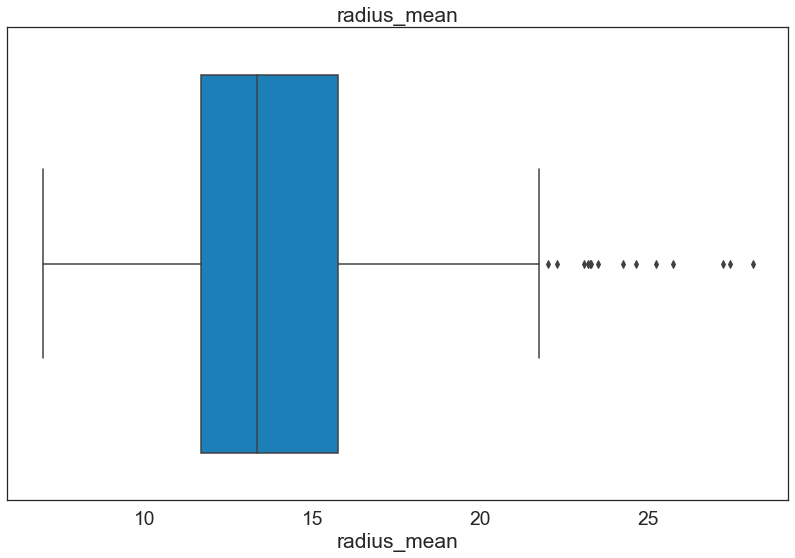

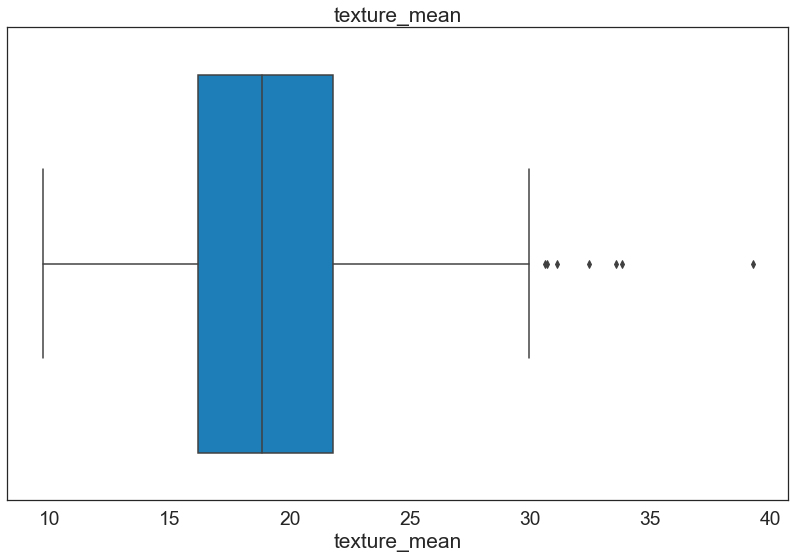

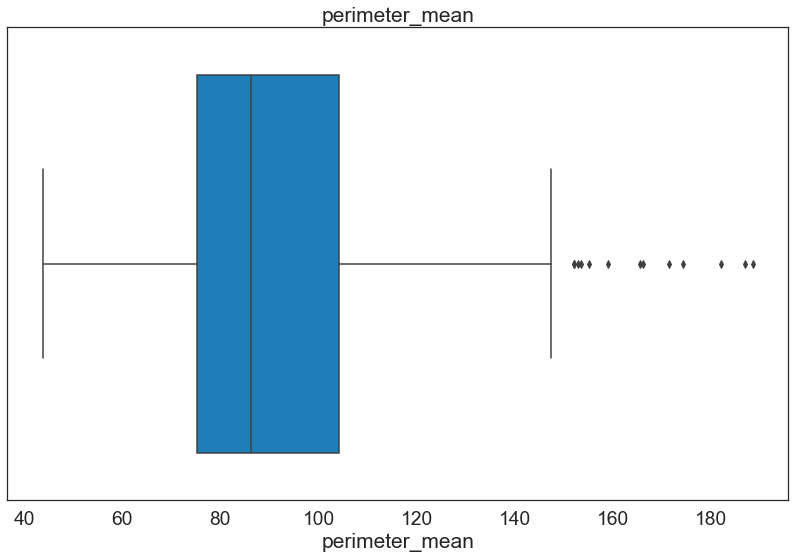

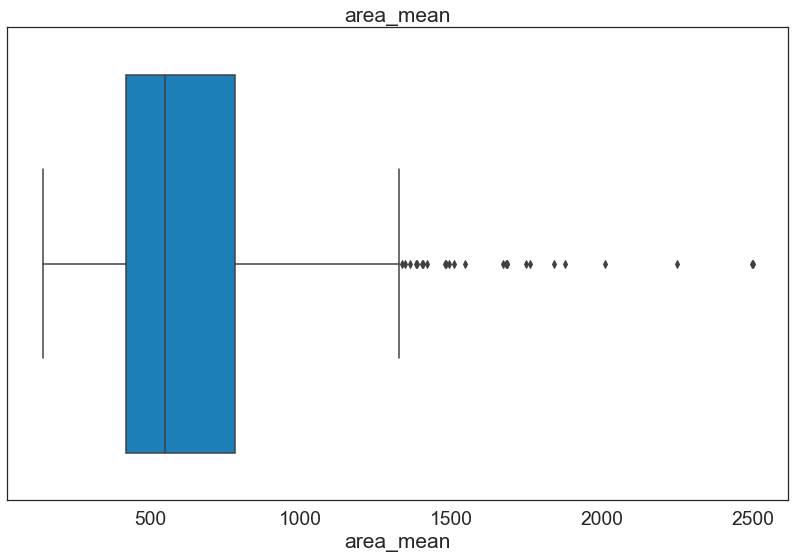

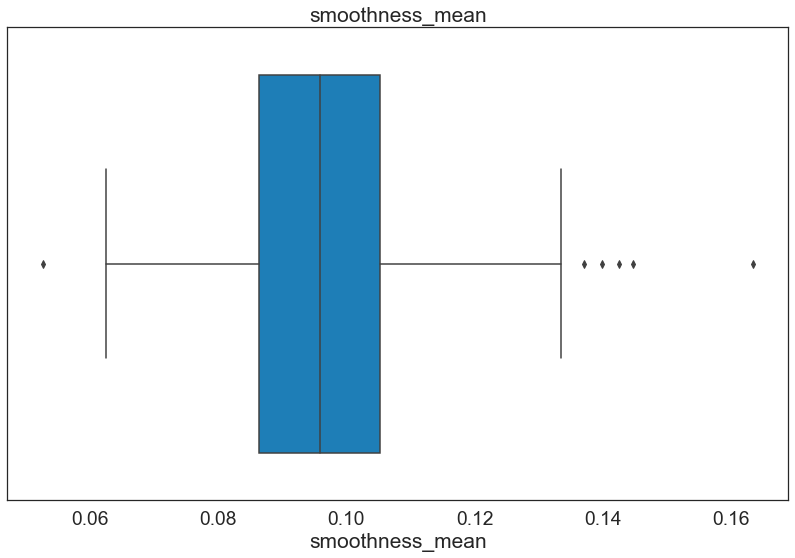

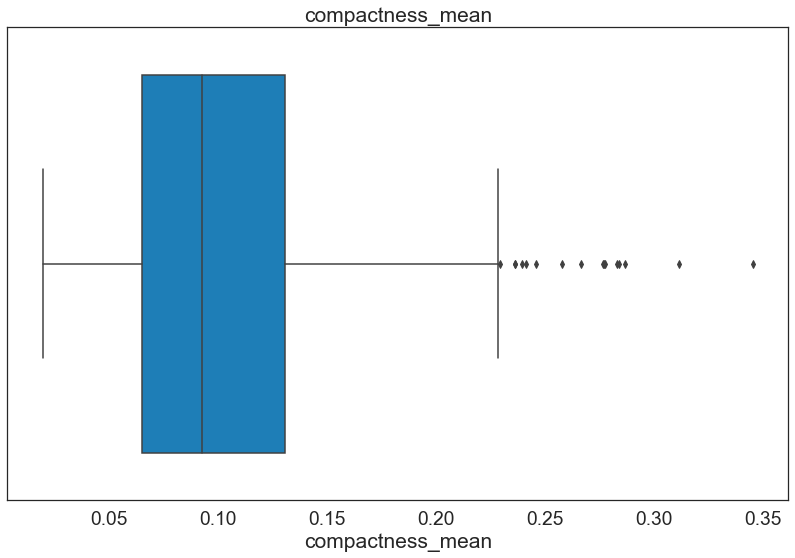

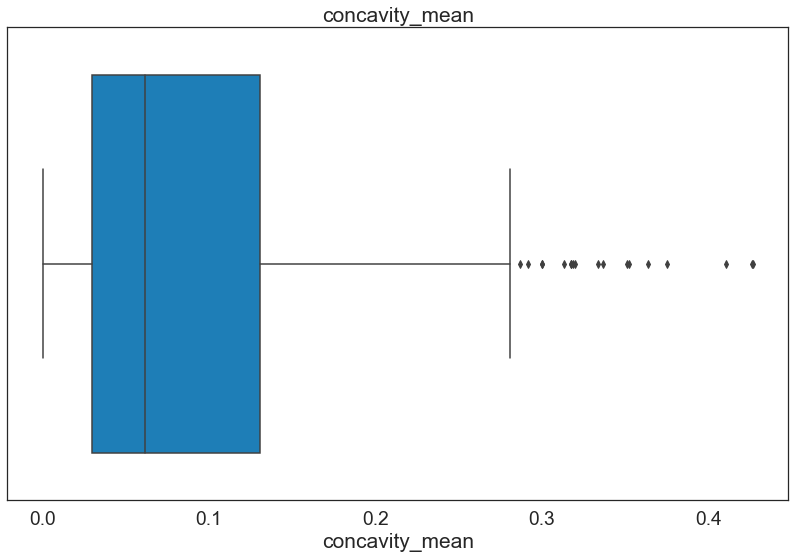

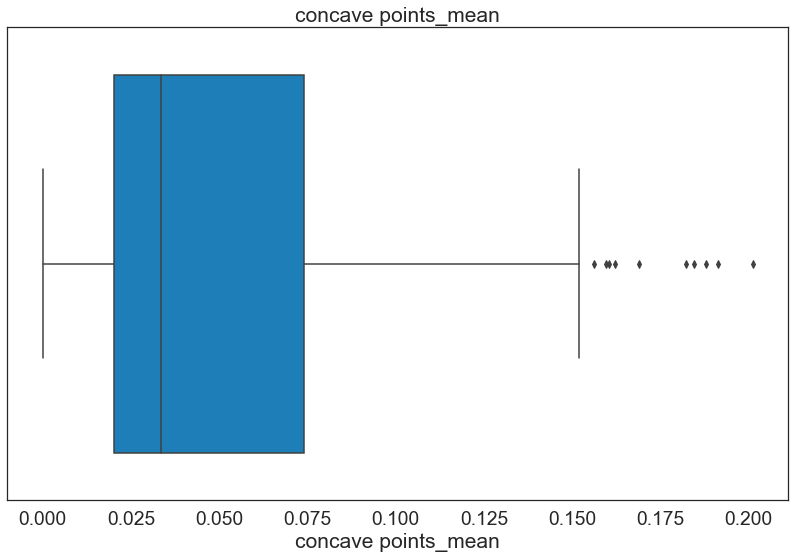

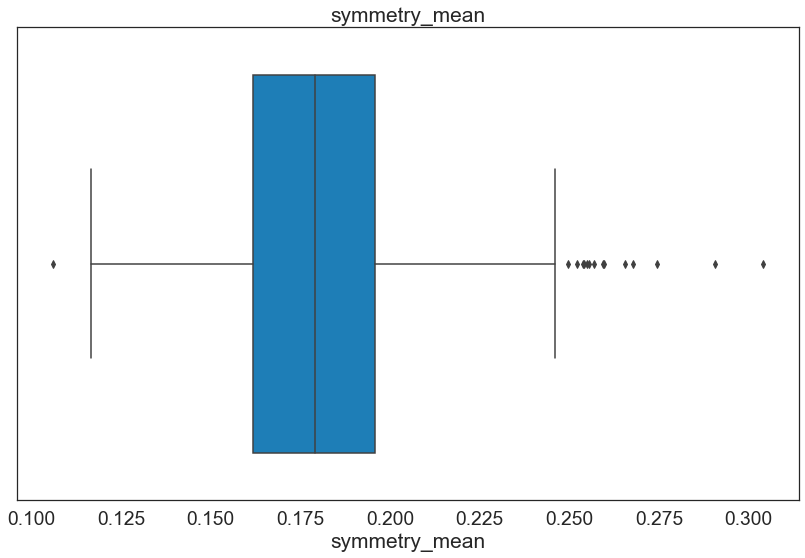

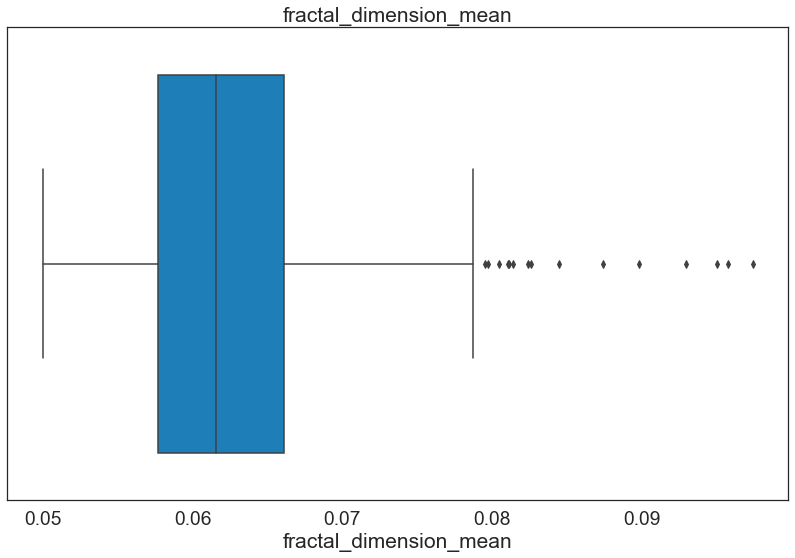

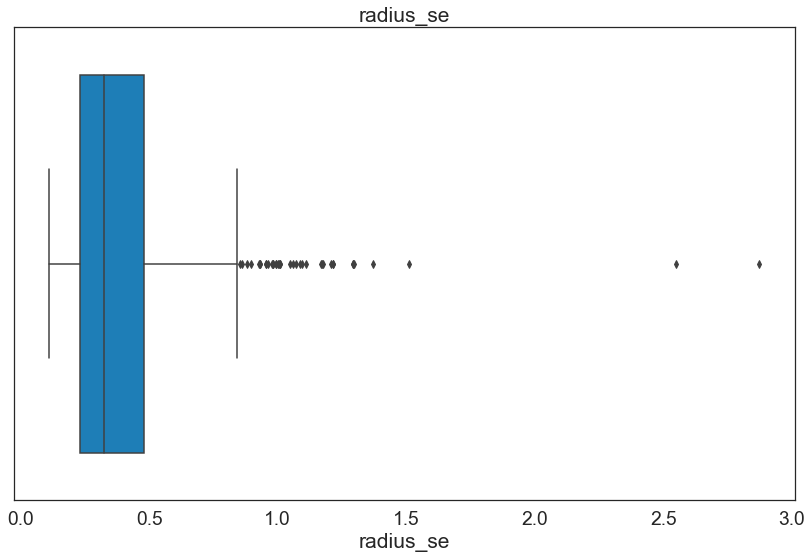

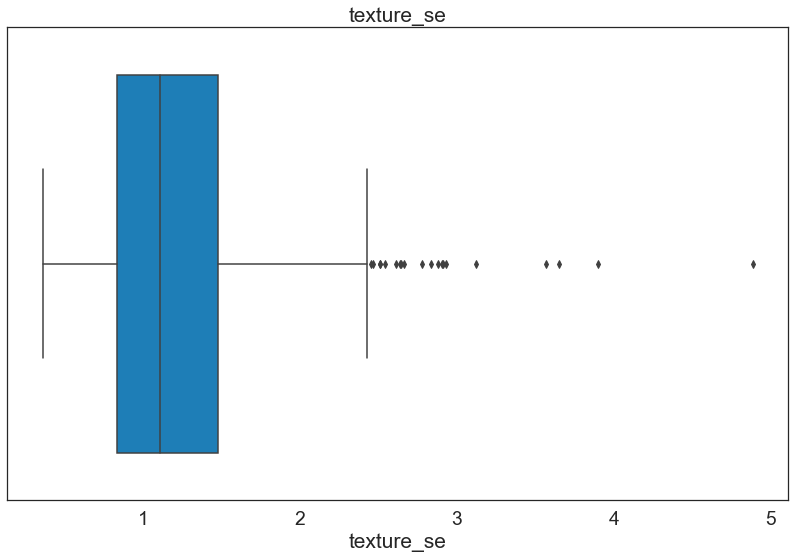

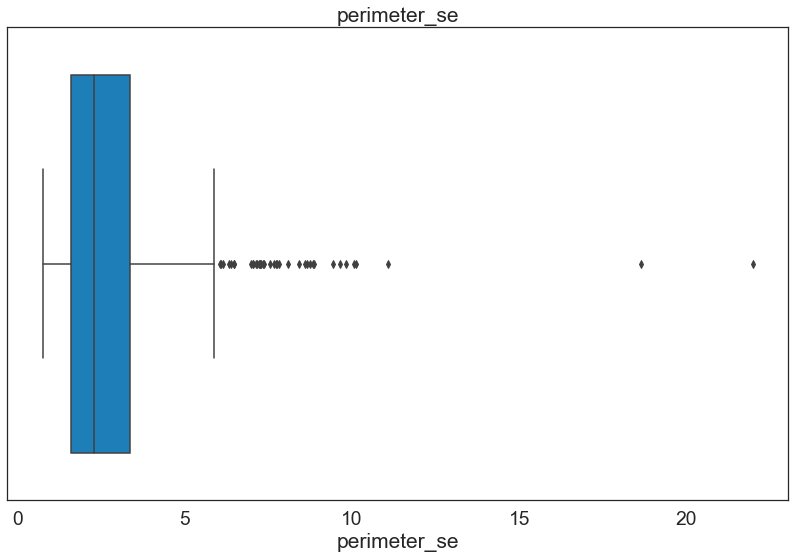

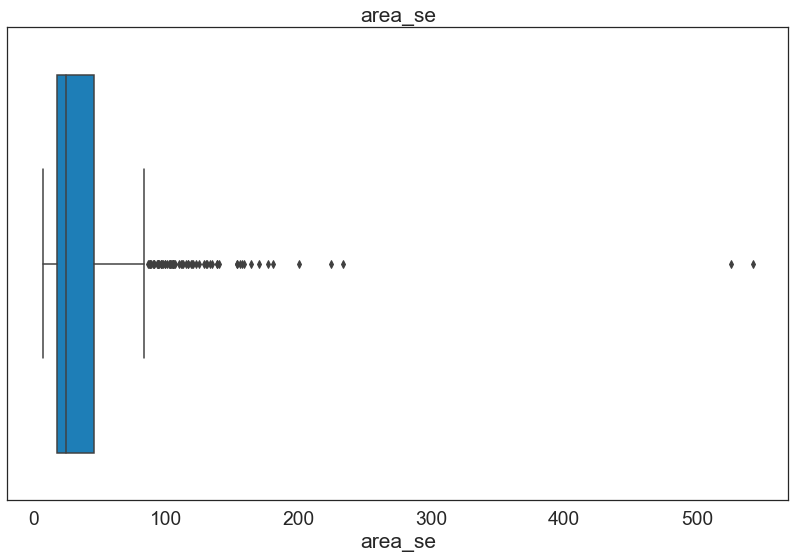

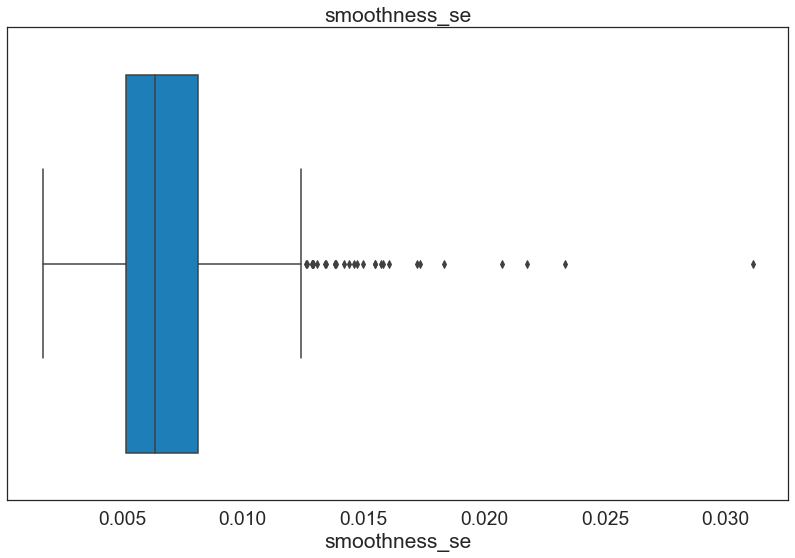

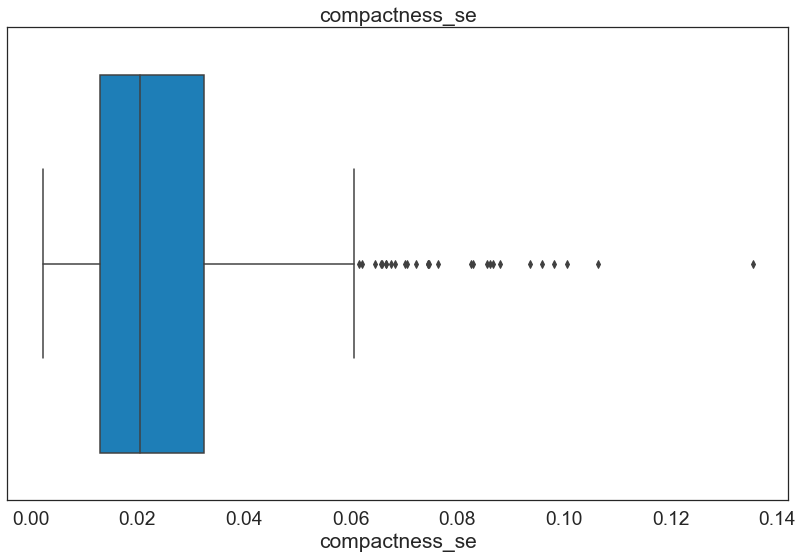

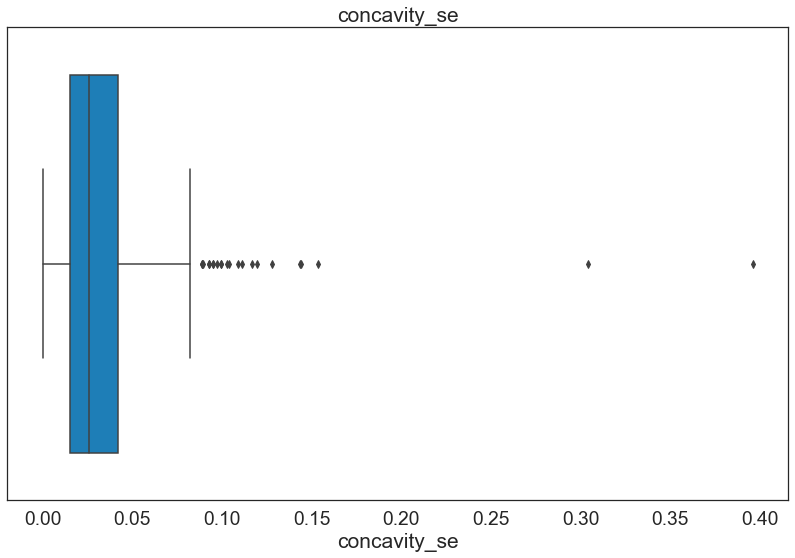

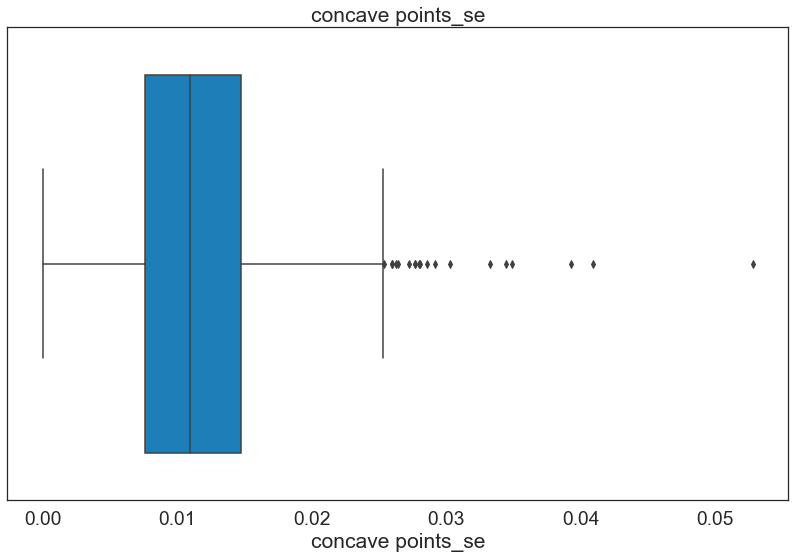

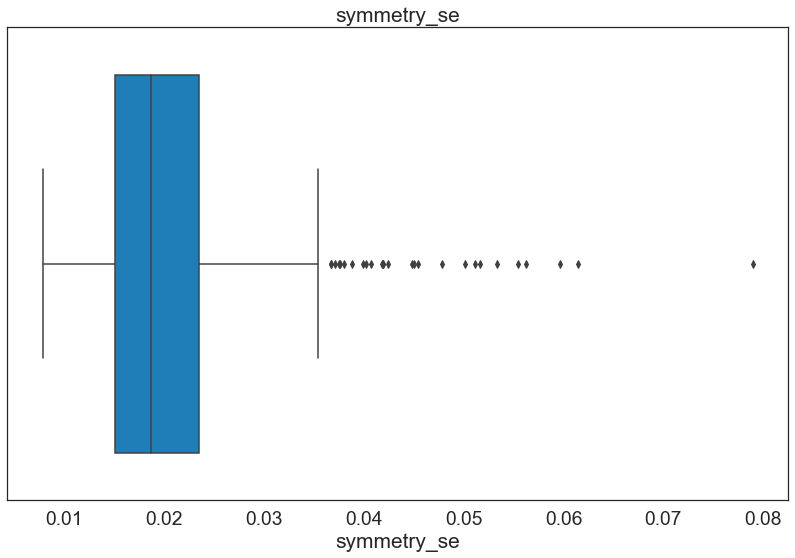

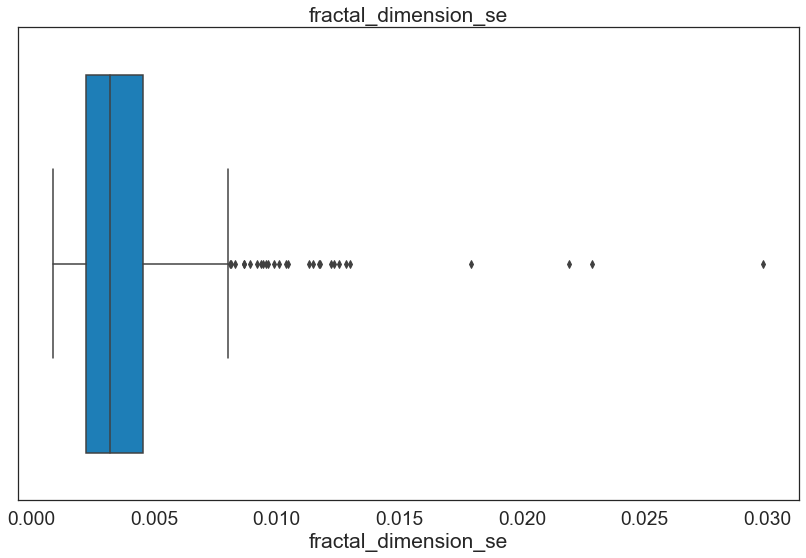

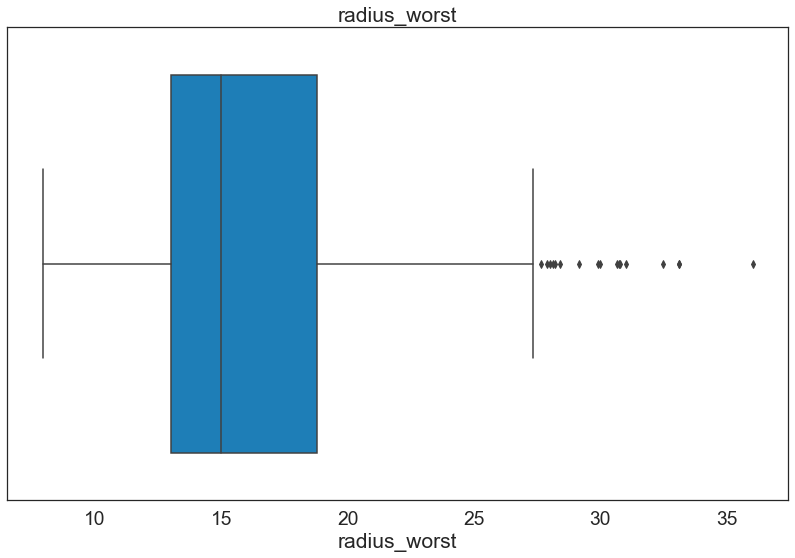

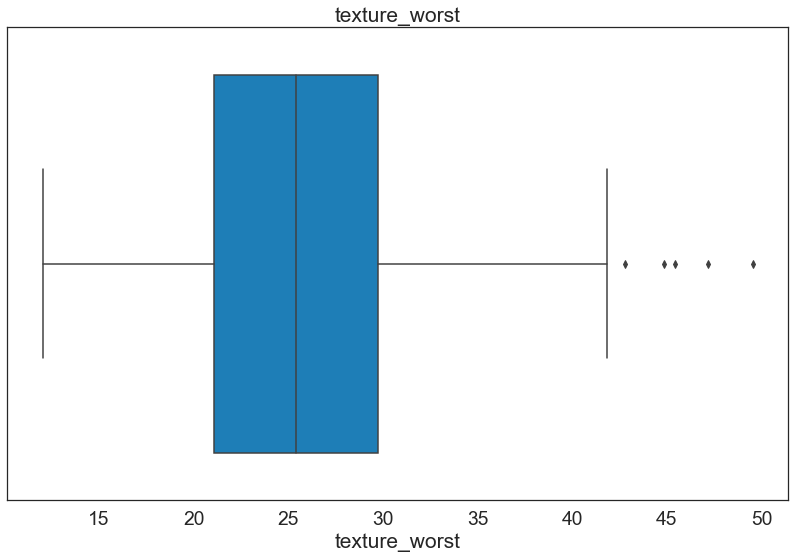

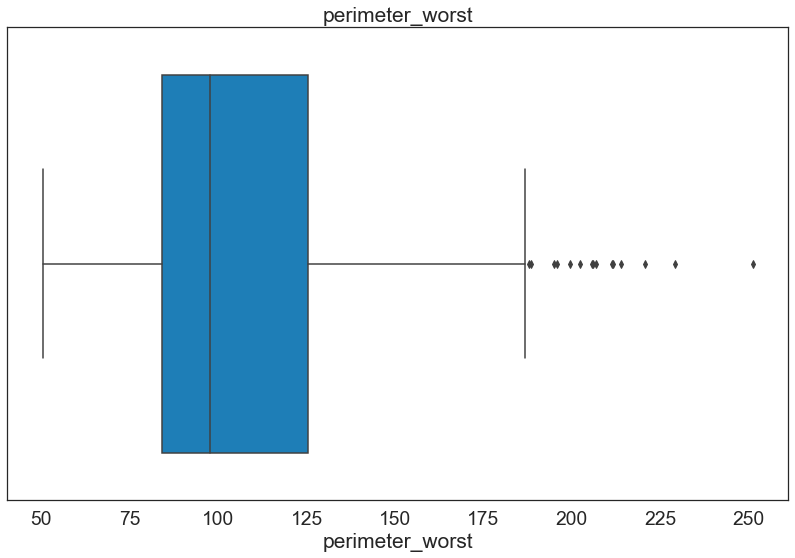

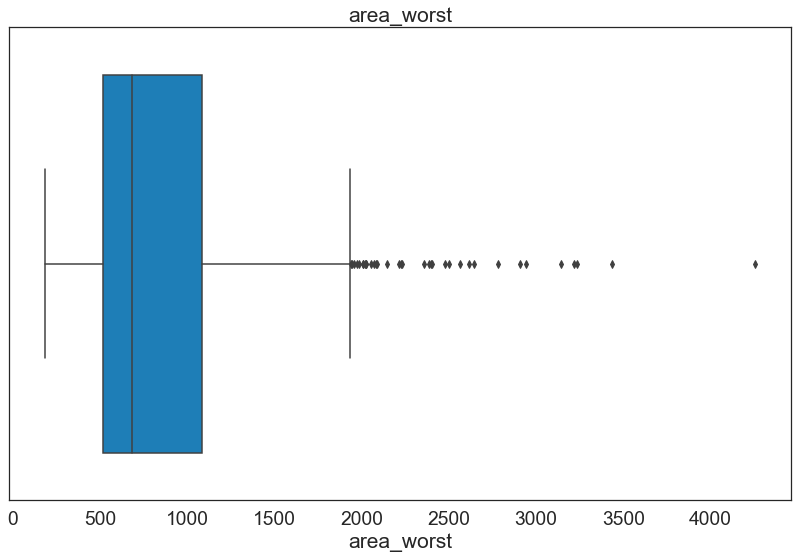

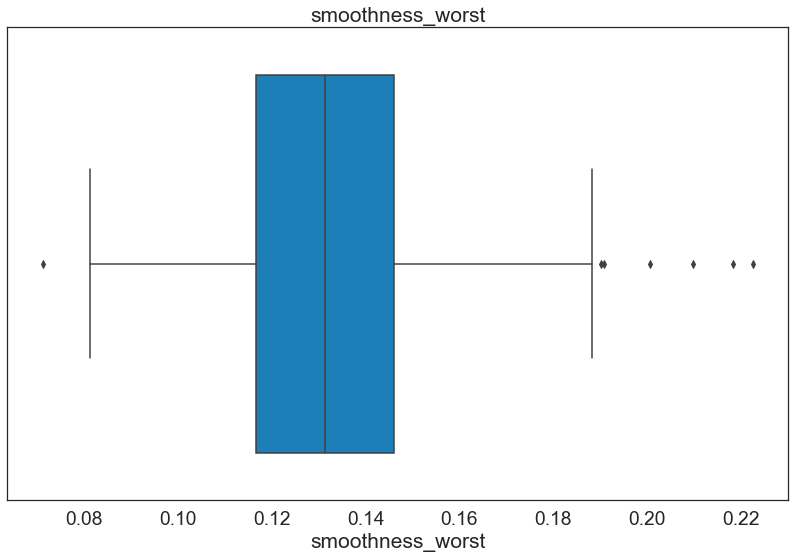

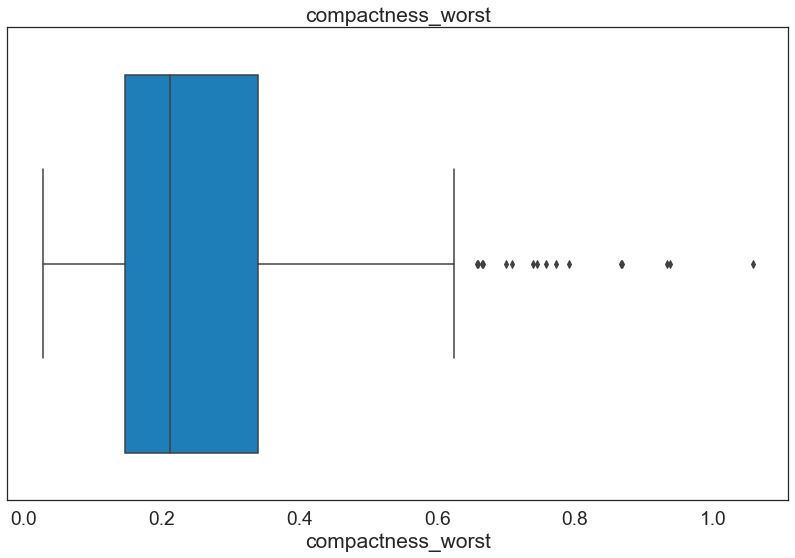

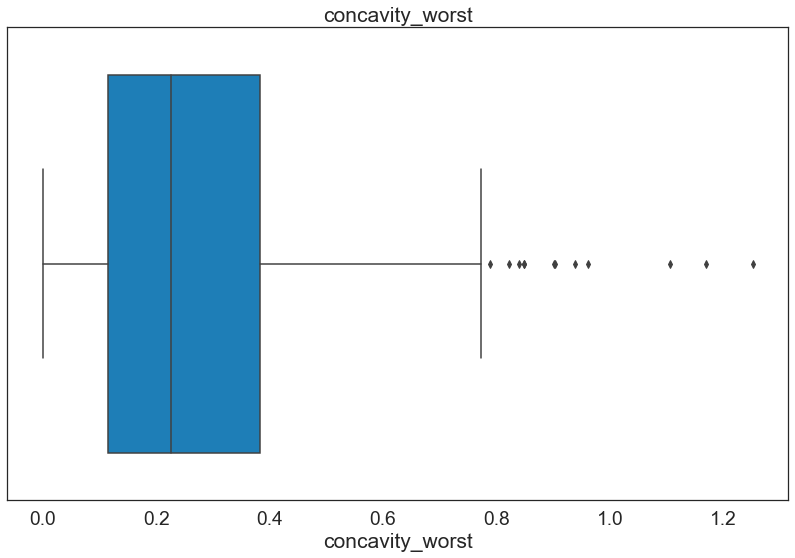

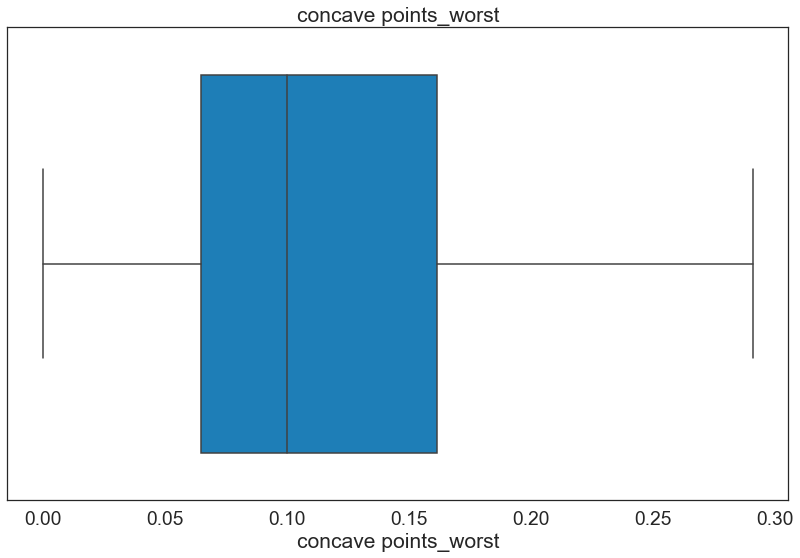

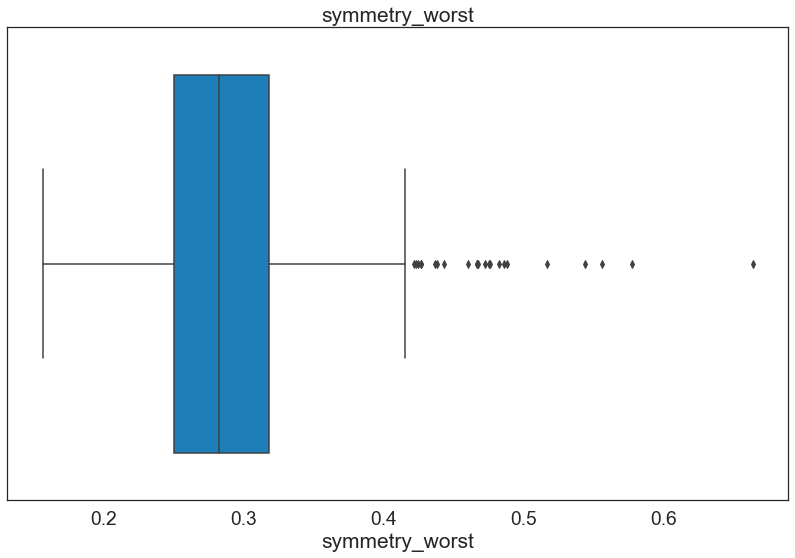

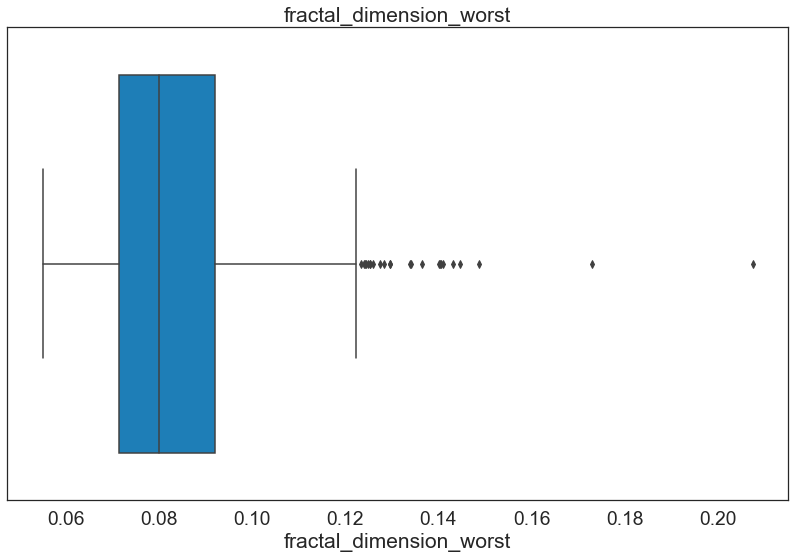

In [144]:
for col in df.columns[:-1] : 
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

### Future work: replace outliers

### 5-Visualization

##### 5.1- Check for variation

- ***Numerical columns***

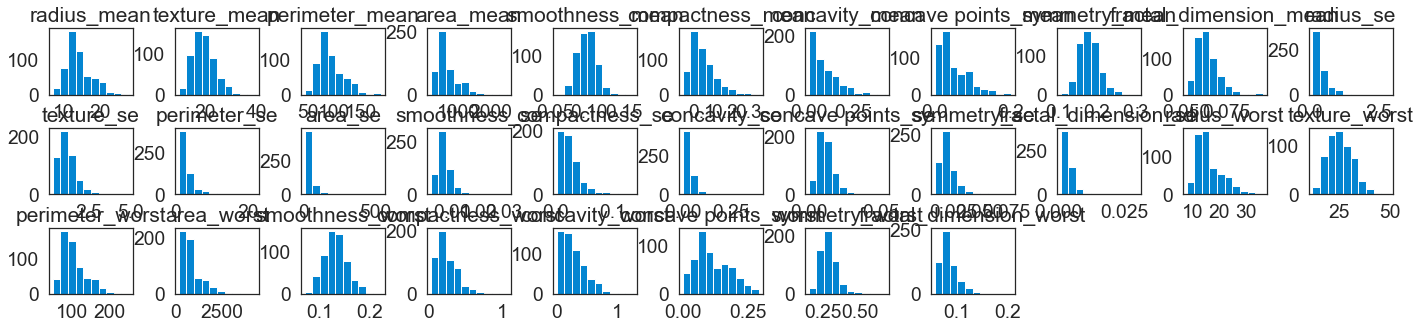

In [146]:
import matplotlib.pyplot as plt

# Adjust figure size to make plots more readable
plt.figure(figsize=(20, 5))

# Loop through each column in the DataFrame
for i, col in enumerate(df.columns[:-1]):
    # Create subplot for each column
    plt.subplot(3, 11, i+1)  # Adjust the subplot layout according to your preference
    plt.title(col)
    plt.hist(df[col])
    plt.tight_layout()  # Ensures that subplots don't overlap

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()


##### 5.2- Check for relation between features and target

- ***Numerical Features***
 - Plotting between categorical and numerical is using a barplot 

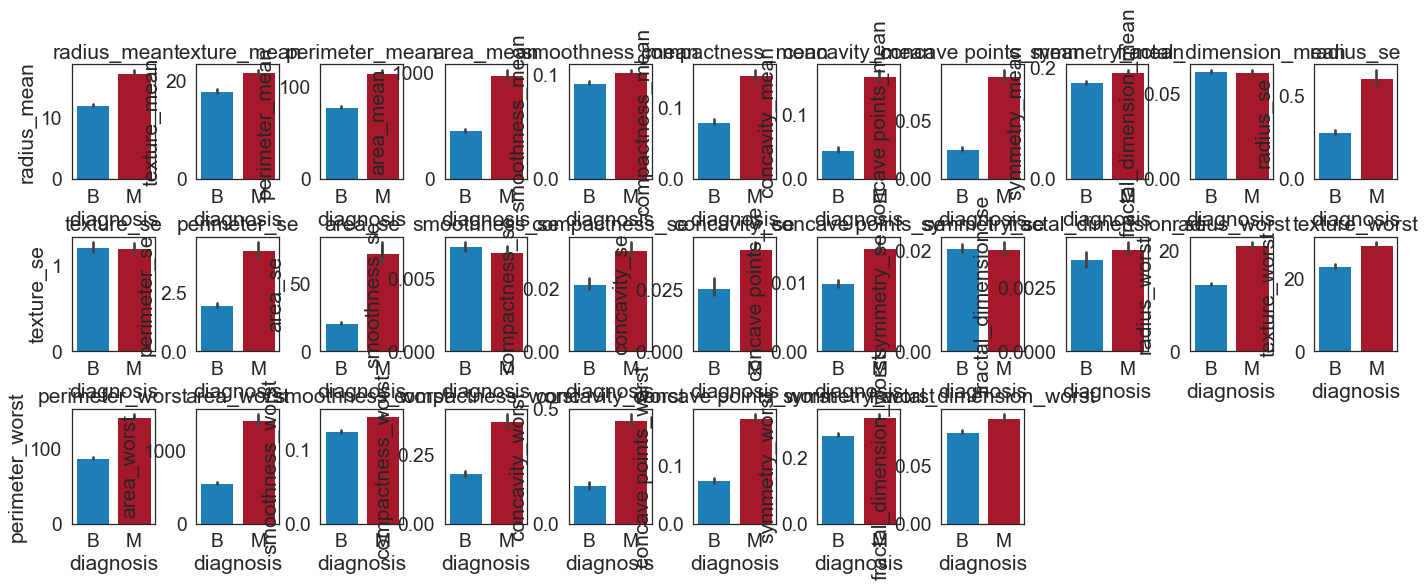

In [147]:
plt.figure(figsize=(20,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,11,i+1)
    plt.title(col)
    sns.barplot(x = "diagnosis" , y = col , data = df )
    plt.tight_layout() 
plt.subplots_adjust(hspace = .5 , wspace = 0.5)
plt.show()

In [148]:
columns_list = df.columns.tolist()
columns_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis']

In [149]:
#I will drop the non affecting columns 
df.drop(['fractal_dimension_mean' , 'texture_se', 'symmetry_se'], axis = 1 , inplace = True)

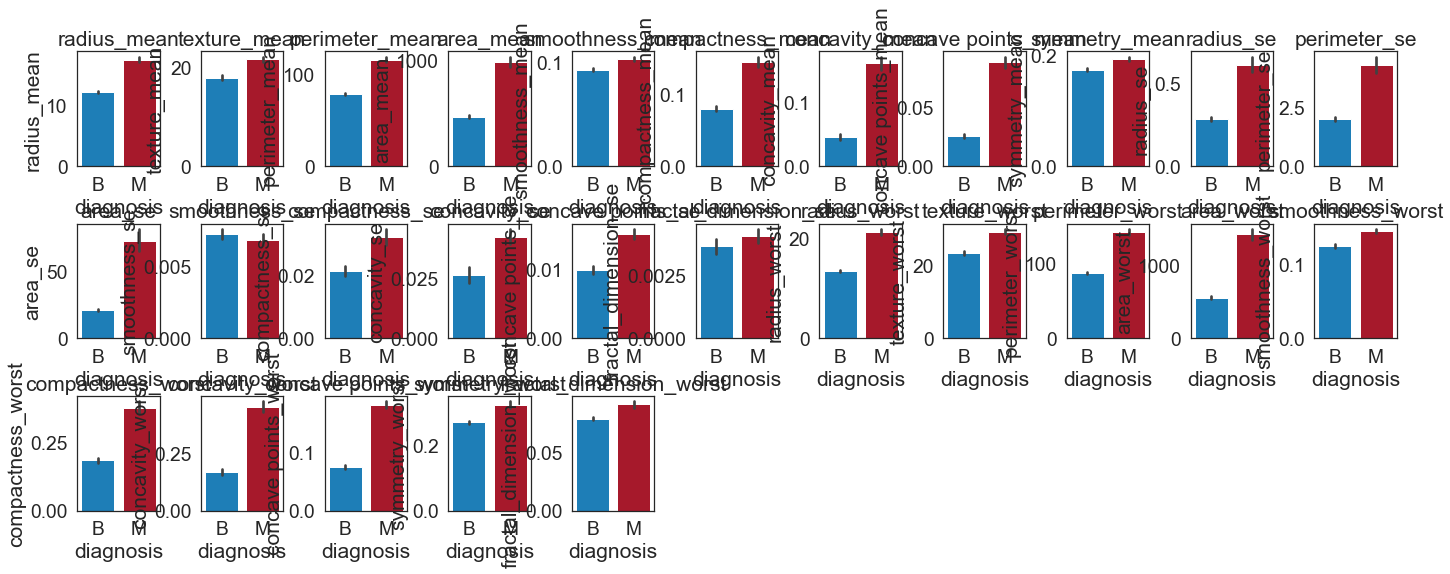

In [150]:
#Check that the remaining  features after drop actually affect the target
plt.figure(figsize=(20,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,11,i+1)
    plt.title(col)
    sns.barplot(x = "diagnosis" , y = col , data = df )
    plt.tight_layout() 
plt.subplots_adjust(hspace = .5 , wspace = 0.5)
plt.show()

In [151]:
#converting target column from categorical to numerical for the model to be able to process it using one-hot encoding
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [152]:
#Train/Test Split
X=df.drop(['diagnosis'],axis=1).values
y=df['diagnosis'].values

In [153]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [154]:
#fearture scaling 
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

train_X=sd.fit_transform(train_X)
test_X=sd.transform(test_X)

### Model

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [156]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=(train_X.shape[1],)))

model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1400      
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,961
Trainable params: 2,961
Non-trainable params: 0
_________________________________________________________________


In [157]:
from tensorflow.keras.optimizers import SGD,Adam

In [158]:
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [159]:
history=model.fit(train_X,train_y,validation_split=0.1,batch_size=128,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 87ms/step - loss: 0.7811 - accuracy: 0.3545 - val_loss: 0.6434 - val_accuracy: 0.5870
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6408 - accuracy: 0.6112 - val_loss: 0.5204 - val_accuracy: 0.7826
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5350 - accuracy: 0.8362 - val_loss: 0.4253 - val_accuracy: 0.9130
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 0.4515 - accuracy: 0.9071 - val_loss: 0.3533 - val_accuracy: 0.9565
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.3864 - accuracy: 0.9462 - val_loss: 0.2974 - val_accuracy: 0.9783
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.3341 - accuracy: 0.9487 - val_loss: 0.2522 - val_accuracy: 0.9783
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2902 - accuracy: 0.9535 - val_loss: 0.2160 - val_accuracy: 0.9783
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 20ms/step - loss: 0.0506 - accuracy: 0.9902 - val_loss: 0.0283 - val_accuracy: 0.9783
Epoch 60/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0498 - accuracy: 0.9902 - val_loss: 0.0277 - val_accuracy: 0.9783
Epoch 61/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0493 - accuracy: 0.9878 - val_loss: 0.0272 - val_accuracy: 0.9783
Epoch 62/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0485 - accuracy: 0.9878 - val_loss: 0.0269 - val_accuracy: 0.9783
Epoch 63/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0477 - accuracy: 0.9902 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0470 - accuracy: 0.9902 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0463 - accuracy: 0.9902 - val_loss: 0.0266 - val_accuracy: 0.9783
Epoch 66/100
4/4 [========

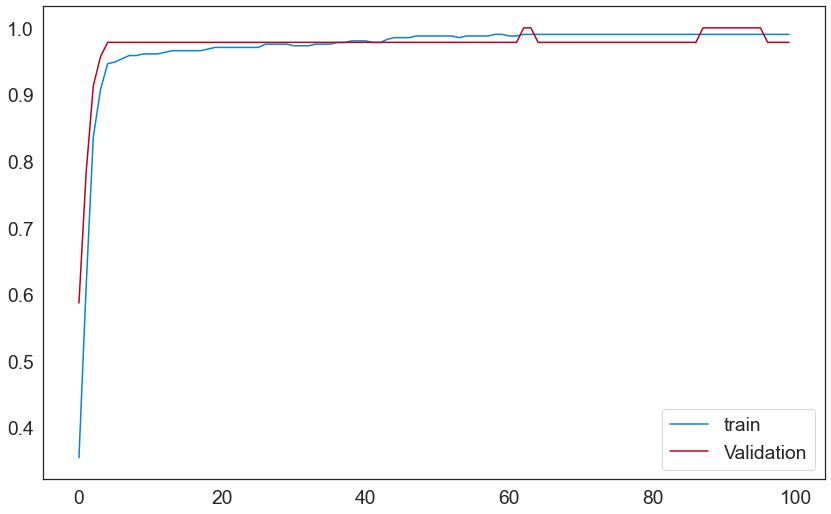

In [160]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [161]:
# Model Evaluation
## Model Loss

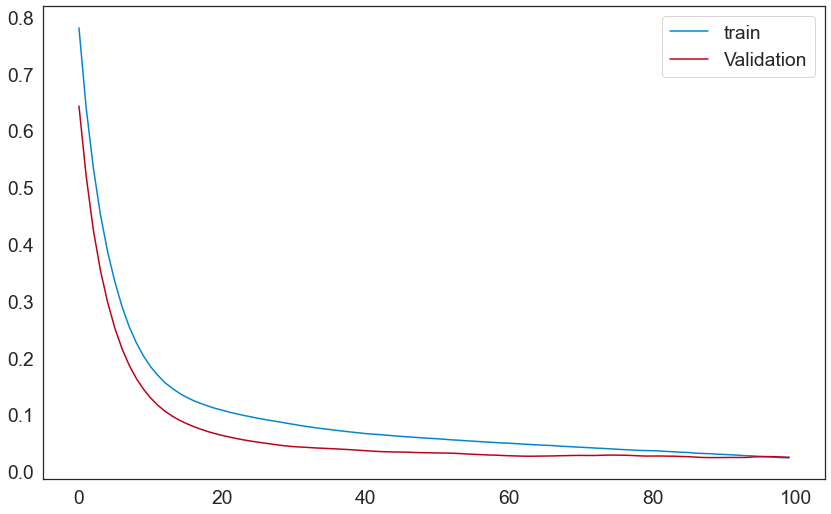

In [162]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()
plt.show()

In [163]:
y_pred=model.predict(test_X)

4/4 [==============================] - 0s 3ms/step


In [164]:
y_p=[]
for i in y_pred:
    if i >0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [165]:
model.evaluate(test_X,test_y)[1]

4/4 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9825


0.9824561476707458

In [166]:
mse = np.mean(np.power(test_X - y_pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

,Reconstruction_error,True_class
count,114.000000,114.000000
mean,0.977149,0.403509
std,1.300026,0.492767
min,0.209972,0.000000
25%,0.472338,0.000000
50%,0.663049,0.000000
75%,1.079949,1.000000
max,12.542918,1.000000


### ROC Curve Check
Receiver operating characteristic curves are an expected output of most binary classifiers. 

In [167]:
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

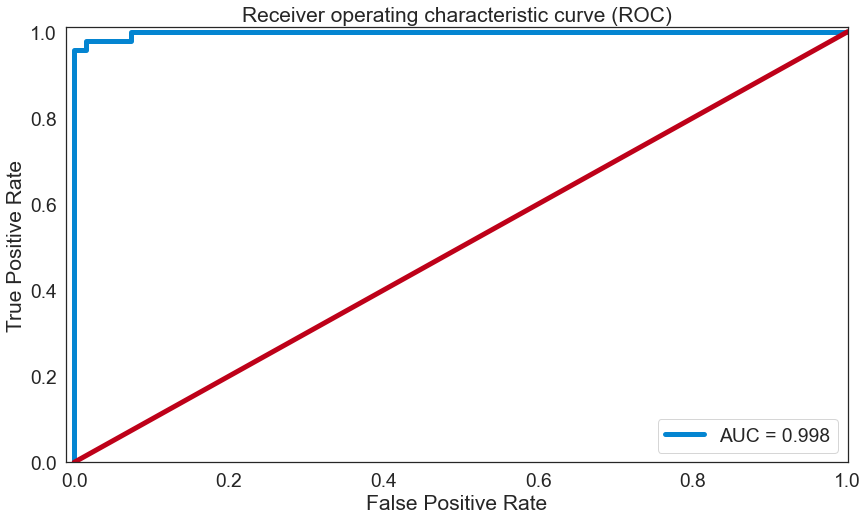

In [168]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(test_y , y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.figure(figsize=(14, 8))
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Recall vs. Precision Thresholding
Now let's look at recall vs. precision to see the trade-off between the two.


In [169]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

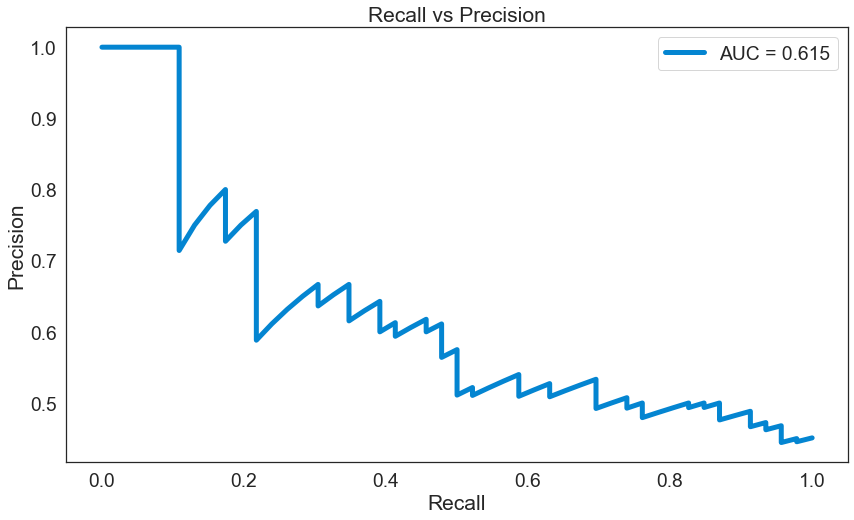

In [170]:
# calculates precision/recall using reconstruction error as the decision function
# returns: 
# precision_rt: Precision values such that element i is the precision of predictions with 
#               score >= thresholds[i] and the last element is 1.
# recall_rt: Decreasing recall values such that element i is the recall of predictions with 
#           score >= thresholds[i] and the last element is 0.
# threshold_rt = Increasing thresholds on the decision function used to compute
#                precision and recall.
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class,
                                                               error_df.Reconstruction_error)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Precision and recall are the eternal tradeoff in data science, so at some point you have to draw an arbitrary line, or a threshold. Where this line will be drawn is essentially a business decision. In this case, you are trading off the cost between missing a fraudulent transaction and the cost of falsely flagging the transaction as a fraudulent even when it is not.

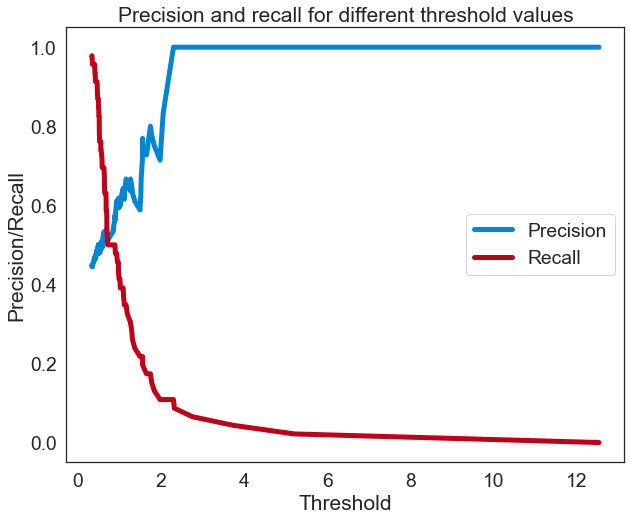

In [175]:
plt.figure(figsize=(10, 8))
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

## Confusion Matrix
Finally, we take a look at a traditional confusion matrix for the 20% of the data we randomly held back in the testing set.

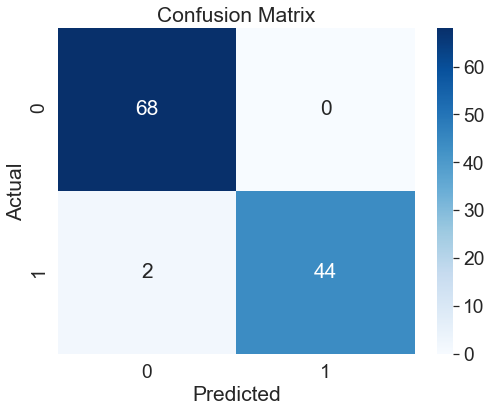

In [181]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_p)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()